# Flight Price Prediction 

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import pickle
import warnings
warnings.filterwarnings('ignore')

Importing All the necessary libraries.

# Reading and Understanding the Data

In [2]:
df = pd.read_excel('Flight Dataset.xlsx')
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
0,Air India,New Delhi,Mumbai,07:00,09:00,2h 00m,Non Stop,Free Meal,2476
1,Air India,New Delhi,Mumbai,09:00,11:15,2h 15m,Non Stop,Free Meal,2476
2,Air India,New Delhi,Mumbai,15:05,18:10,3h 05m,1 stop,Free Meal,2791
3,Air India,New Delhi,Mumbai,17:50,21:35,3h 45m,1 stop,Free Meal,2791
4,Jet Airways,New Delhi,Mumbai,07:55,10:15,2h 20m,Non Stop,Free Meal,3173


Here we read the Excel file in jupyter notebook.

In [3]:
df = pd.DataFrame(data=df)
df.tail()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
1545,Air India,Bangalore,New Delhi,08:15,18:30,10h 15m,1 stop,No info,4943
1546,Air India,Bangalore,New Delhi,00:30,23:55,23h 25m,1 stop,No info,10394
1547,Jet Airways,Bangalore,New Delhi,11:40,21:20,9h 40m,1 stop,1 Long layover,27992
1548,IndiGo,Bangalore,New Delhi,18:25,21:20,2h 55m,non-stop,No info,7648
1549,IndiGo,Bangalore,New Delhi,10:05,13:00,2h 55m,non-stop,No info,7648


Here we are loading the dataset into DataFrame.

# Data Inspection

In [4]:
df.shape

(1550, 9)

There are 1550 rows and 9 columns in our dataset.

In [5]:
df.dtypes

Airline            object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price (in ₹)        int64
dtype: object

All the columns are of object datatype except the target variable, 'Price (in ₹)' which is of integer data type.

In [6]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price (in ₹)'],
      dtype='object')

It gives us the names of all columns present in the Flight Dataset.

About Columns:

1. Airline : Name of the airline
2. Source : City of Departure
3. Destination : City of Arrival
4. Dep_Time: Time of Departure
5. Arrival_Time : Time of Arrival
6. Duration : Total duration of the journey
7. Total_Stops : Number of stops in a journey
8. Additional_Info : Additional Information about the flight (If any)
9. Price (in ₹) : Price of the ticket to fly
    
Here Price (in ₹) is our target variable.    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1550 non-null   object
 1   Source           1550 non-null   object
 2   Destination      1550 non-null   object
 3   Dep_Time         1550 non-null   object
 4   Arrival_Time     1550 non-null   object
 5   Duration         1550 non-null   object
 6   Total_Stops      1550 non-null   object
 7   Additional_Info  1550 non-null   object
 8   Price (in ₹)     1550 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 109.1+ KB


There are 9 columns and all the columns have 1550 non-null values and all the columns are of object data type except 'Price (in ₹)' which is of integer data type. 
The total memory usage of this dataset is 109.1 KB.

# Data Cleaning

In [8]:
#Checking for Null values
df.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price (in ₹)       0
dtype: int64

There are no Null Values in the Dataset.

<AxesSubplot:>

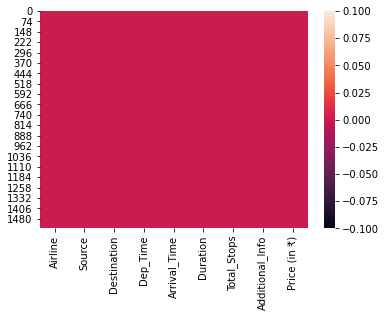

In [9]:
sn.heatmap(df.isnull())

Visual representation of having absolutely no null values.

In [10]:
#Checking for outliers and Skewness
#Since all the variables are of object data type, except the target. Hence, we will not check for outliers or skewness.

# Exploratory Data Analysis

<AxesSubplot:xlabel='Price (in ₹)', ylabel='Density'>

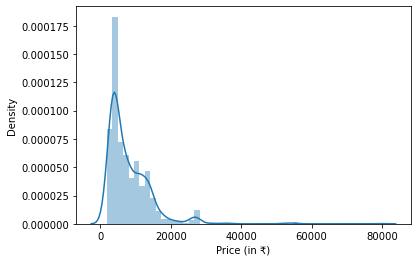

In [11]:
sn.distplot(df['Price (in ₹)'])

The maximum flights are within ₹ 10000 

<AxesSubplot:xlabel='Price (in ₹)'>

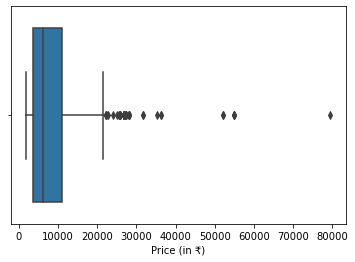

In [12]:
sn.boxplot(df['Price (in ₹)'])

There are few outliers in our target and also it is nearly tightly distributed.

<AxesSubplot:xlabel='Price (in ₹)'>

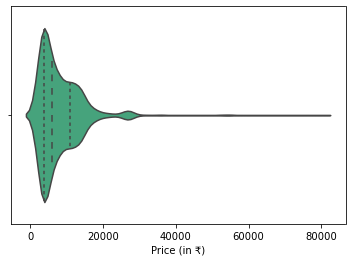

In [13]:
sn.violinplot(x=df['Price (in ₹)'], inner="quartile", color="#36B37E")

Our dataset contains a lot of variables, but the most important one for us to explore is the target variable. We need to understand its distribution. First, we start by plotting the violin plot for the target variable. The width of the violin represents the frequency.

We can see from the plot that most flight prices fall within 10,000. The dashed lines represent the locations of the three quartiles Q1, Q2 (the median), and Q3. 

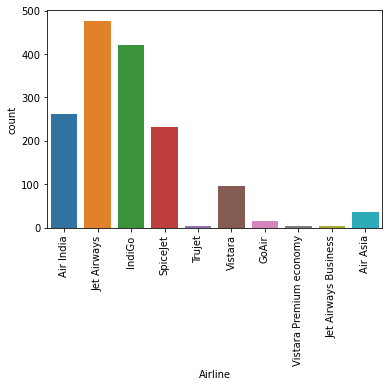

In [14]:
sn.countplot(df['Airline'])
plt.xticks(rotation=90)
plt.show()

The maximum flights taken/available belongs to airline 'Jet Airways' followed by "IndiGo" and "Air India".

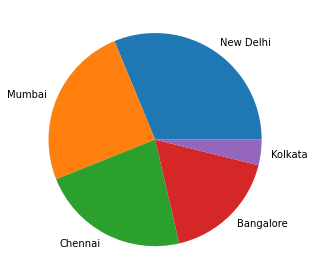

In [15]:
plt.pie(df['Source'].value_counts(), labels=df['Source'].unique(),shadow=False)
plt.tight_layout()
plt.show()

New Delhi and Mumbai have more flights compared to other sources.

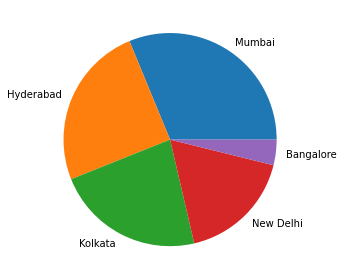

In [16]:
plt.pie(df['Destination'].value_counts(), labels=df['Destination'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Maximum passengers take a flight to Mumbai.

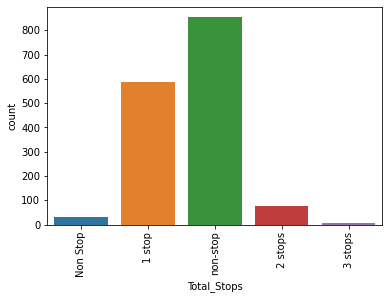

In [17]:
sn.countplot(df['Total_Stops'])
plt.xticks(rotation=90)
plt.show()

Maximum flights are with non-stop followed by 1 stop flights.

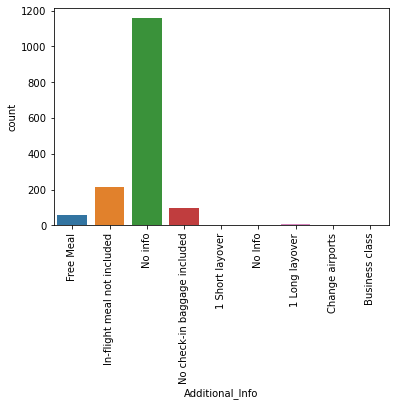

In [18]:
sn.countplot(df['Additional_Info'])
plt.xticks(rotation=90)
plt.show()

There is no 'Additional_Info' for maximum flights. Only few flights offer free meal and no check-in baggage. 

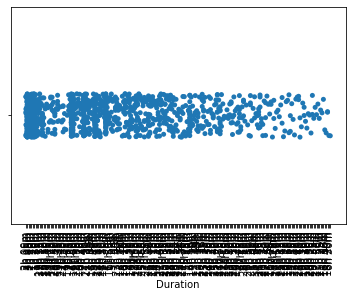

In [19]:
sn.stripplot(df['Duration'])
plt.xticks(rotation=90)
plt.show()

Since departure time , arrival time and duration have a wide number of unique values in it , hence we will not be performing their Univariate Analysis.

# Bivariate Analysis

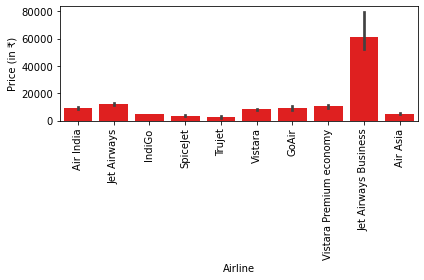

In [20]:
sn.barplot(x=df['Airline'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

The Maximum priced 'Airline' is Jet airways business and the cheapest is Spicejet.

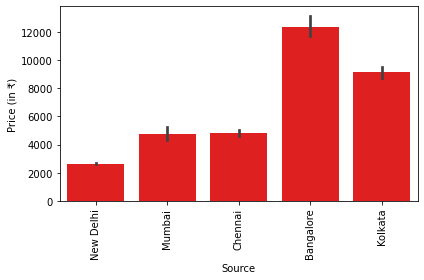

In [21]:
sn.barplot(x=df['Source'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

Flights from Bangalore and Kolkata are costly 

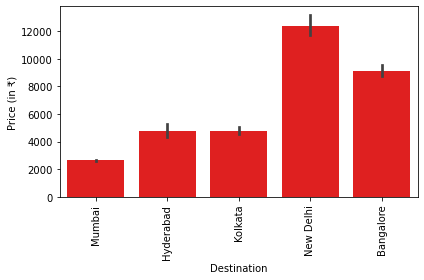

In [22]:
sn.barplot(x=df['Destination'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

Flights to New Delhi and Bangalore are costly.

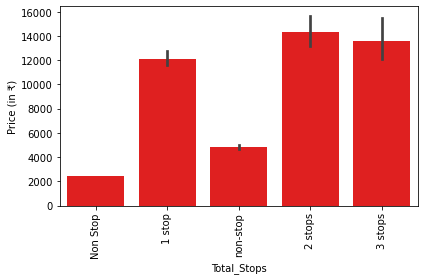

In [23]:
sn.barplot(x=df['Total_Stops'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

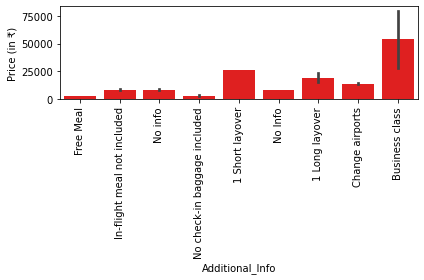

In [24]:
sn.barplot(x=df['Additional_Info'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

Direct flights fits in budget well as they do not give any additional free meal or layovers.

Flights that provide a layover are usually costly.

In [25]:
df.drop(['Price (in ₹)'],axis=1).astype('category')
le=LabelEncoder()
cnt=0
for col in df:
    if df[col].dtype=='object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        cnt += 1
df        

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price (in ₹)
0,1,4,3,25,142,149,3,4,2476
1,1,4,3,41,214,150,3,4,2476
2,1,4,3,84,298,166,0,4,2791
3,1,4,3,109,355,169,0,4,2791
4,1,4,3,25,142,149,3,4,2476
...,...,...,...,...,...,...,...,...,...
1545,1,0,4,34,307,0,0,8,4943
1546,1,0,4,0,398,105,0,8,10394
1547,4,0,4,60,352,219,0,0,27992
1548,3,0,4,111,352,158,4,8,7648


We have encoded the feature variables using label encoder technique.

# Multivariate Analysis

<AxesSubplot:>

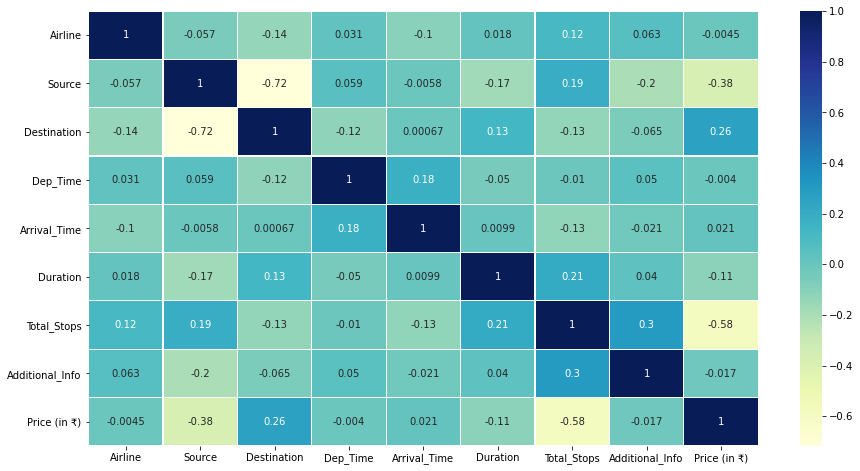

In [26]:
a=df.corr()
plt.figure(figsize=(15,8))
sn.heatmap(a,linewidth=0.1, cmap="YlGnBu", annot = True)

There does not exist any multicollinearity in the dataset.

# Model Building

In [27]:
x = df.drop(['Price (in ₹)'],axis=1)
y = df['Price (in ₹)']

Separating feature and target variables into x and y.

In [28]:
scale = StandardScaler()
x=scale.fit_transform(x)

Scaling the feature variables of the dataset.

# 1. Ridge

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 45 )
ridge = Ridge(alpha = 0.5)
ridge.fit(xtrain, ytrain)
pred_test_r= ridge.predict(xtest)
print('Ridge Regression Score:',ridge.score(xtrain,ytrain))
print('Ridge Regression r2_score:',r2_score(ytest,pred_test_r))
print("Mean squared error of Ridge Regression:",mean_squared_error(ytest,pred_test_r))
print("Root Mean Square error of Ridge Regression:",np.sqrt(mean_squared_error(ytest,pred_test_r)))

Ridge Regression Score: 0.42102269986725194
Ridge Regression r2_score: 0.4427111921124248
Mean squared error of Ridge Regression: 19719147.34985683
Root Mean Square error of Ridge Regression: 4440.624657619334


# 2. Elastic Net

In [30]:
en = ElasticNet(alpha = 0.001)
en.fit(xtrain, ytrain)
pred_test_en= en.predict(xtest)
print('ElasticNet Regression Score:',en.score(xtrain,ytrain))
print('ElasticNet Regression r2_score:',r2_score(ytest,pred_test_en))
print("Mean squared error of ElasticNet Regression:",mean_squared_error(ytest,pred_test_en))
print("Root Mean Square error of ElasticNet Regression:",np.sqrt(mean_squared_error(ytest,pred_test_en)))

ElasticNet Regression Score: 0.42102268383685204
ElasticNet Regression r2_score: 0.4427119644724037
Mean squared error of ElasticNet Regression: 19719120.020615667
Root Mean Square error of ElasticNet Regression: 4440.621580433945


# 3. Decision Tree Regressor

In [31]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
pred_train_dtr=dtr.predict(xtrain)
pred_test_dtr=dtr.predict(xtest)
print('Decision Tree Regressor Score:',dtr.score(xtrain,ytrain))
print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))

Decision Tree Regressor Score: 0.9697230199412826
Decision Tree Regressor r2_score: 0.7646436014054596
Mean squared error of Decision Tree Regressor: 8327867.773281459
Root Mean Square error of Decision Tree Regressor: 2885.8045279057724


# 4. K-Neighbors Regressor

In [32]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
print('K Neighbors Regressor Score:',knr.score(xtrain,ytrain))
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))

K Neighbors Regressor Score: 0.7602407737247007
K Neighbors Regressor r2_score: 0.6029044870395156
Mean squared error of K Neighbors Regressor: 14050856.2547957
Root Mean Square error of K Neighbors Regressor: 3748.4471791390765


# 5. SGD Regressor

In [33]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
pred_train_sgd=sgd.predict(xtrain)
pred_test_sgd=sgd.predict(xtest)
print('SGD Regressor Score:',sgd.score(xtrain,ytrain))
print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))

SGD Regressor Score: 0.42073845795608456
SGD Regressor r2_score: 0.44608794440570754
Mean squared error of SGD Regressor: 19599664.103301767
Root Mean Square error of SGD Regressor: 4427.150788408022


# 6. Random Forest Regressor

In [34]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Forest Regressor Score:',rf.score(xtrain,ytrain))
print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
print("Mean squared error of Random Forest Regressor:",mean_squared_error(ytest,pred_test_rf))
print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_rf)))

Random Forest Regressor Score: 0.942895397322718
Random Forest Regressor r2_score: 0.8195508129194671
Mean squared error of Random Forest Regressor: 6385027.0431426745
Root Mean Square error of Random Forest Regressor: 2526.861104837912


r2_score and Score of Random Forest Regressor is very nice .

# 7. Gradient Boosting Regressor

In [35]:
gb=GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
pred_train_gb=gb.predict(xtrain)
pred_test_gb=gb.predict(xtest)
print('Gradient Boosting Regressor Score:',gb.score(xtrain,ytrain))
print('Gradient Boosting Regressor r2_score:',r2_score(ytest,pred_test_gb))
print("Mean squared error of Gradient Boosting Regressor:",mean_squared_error(ytest,pred_test_gb))
print("Root Mean Square error of Gradient Boosting Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_gb)))

Gradient Boosting Regressor Score: 0.8682020013864885
Gradient Boosting Regressor r2_score: 0.7595134586149259
Mean squared error of Gradient Boosting Regressor: 8509393.115582515
Root Mean Square error of Gradient Boosting Regressor: 2917.0864086589063


r2_score and Score of Gradient Boosting Regressor is very nice and similar to Random forest Regressor.

# Cross Validation Score

In [36]:
print('Cross Validation Score of Ridge is',(cvs(ridge,x,y,cv=5).mean())*100)
print('Cross Validation Score of Elastic Net is',(cvs(en,x,y,cv=5).mean())*100)
print('Cross Validation Score of Decision Tree Regressor is',(cvs(dtr,x,y,cv=5).mean())*100)
print('Cross Validation Score of KNeighbors Regressor is',(cvs(knr,x,y,cv=5).mean())*100)
print('Cross Validation Score of SGD Regressor is',(cvs(sgd,x,y,cv=5).mean())*100)
print('Cross Validation Score of Random Forest Regressor is',(cvs(rf,x,y,cv=5).mean())*100)
print('Cross Validation Score of Gradient Boosting Regressor is',(cvs(gb,x,y,cv=5).mean())*100)

Cross Validation Score of Ridge is 2.584360406486026
Cross Validation Score of Elastic Net is 2.603333608353706
Cross Validation Score of Decision Tree Regressor is 46.70954385493843
Cross Validation Score of KNeighbors Regressor is 45.05763220205954
Cross Validation Score of SGD Regressor is 3.610953416982723
Cross Validation Score of Random Forest Regressor is 59.88384301459255
Cross Validation Score of Gradient Boosting Regressor is 58.32161116293408


The least difference between r2_score and cross validation score is for Random Forest Regressor, hence we will use that model.

# Hyper Parameter Tuning

In [37]:
parameter = { 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],}

gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

Getting all the best parameter to apply in our selected model.

In [38]:
priceflight = RandomForestRegressor(bootstrap=False,min_samples_leaf=1,max_features='sqrt',min_samples_split=5)
priceflight.fit(xtrain,ytrain)
pred=priceflight.predict(xtest)
acc=r2_score(ytest,pred)
print('Score of Hyper Parameter Tuned Ranfom Forest Regressor is:',priceflight.score(xtrain,ytrain))
print('Accuracy for predicting price of flight is', (acc*100),'%')
print("Mean squared error of Hyper Parameter Tuned Random Forest Regressor:",mean_squared_error(ytest,pred))
print("Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred)))

Score of Hyper Parameter Tuned Ranfom Forest Regressor is: 0.9416064089464501
Accuracy for predicting price of flight is 85.35543395245519 %
Mean squared error of Hyper Parameter Tuned Random Forest Regressor: 7658728.852515328
Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor: 2767.440848964134


The score and r2_score of this model is quite acceptable.

# Conclusion

In [39]:
a= np.array(ytest)
predicted = np.array(priceflight.predict(xtest))
fp=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
fp

,Original,Predicted
0,3597,3597.000000
1,2754,2870.830000
2,6528,9463.859167
3,13364,13532.130000
4,8040,10172.290000
...,...,...
460,8352,10952.724167
461,3597,3597.000000
462,16736,14105.420000
463,3739,3994.933333


The predicted price lies very close to the original price. Hence we accept this model.

# Model Saving

In [40]:
import pickle
filename = 'PriceFlight.pkl'
pickle.dump(priceflight,open(filename,'wb'))

Hence saved the best model by the name PriceFlight.pkl